In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import datasets, layers, models
import random
import pickle



code to just display one image from our dataset

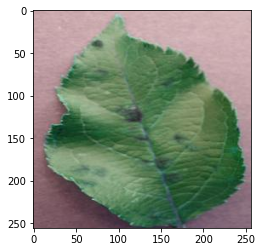

In [2]:

DATADIR = r"C:\Users\Yashwanth\Kodikon\DataSet\NewData\train"#directory of the main dataset

CATEGORIES = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
#converting images in the dataset to numpy arrays and storing it in training_data

#training data has two columns the array equivalent of the image in one column and the labels of the image on the other column

training_data = []
DATADIR = r"C:\Users\Yashwanth\Kodikon\DataSet\NewData\train"#directory of the main dataset

CATEGORIES = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight']
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                # new_array = cv2.resize(img_array, (32, 32))  # resize to normalize data size
                training_data.append([img_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 1908/1908 [00:00<00:00, 2245.21it/s]

18596


In [4]:
#shuffling the training data to prevent overfitting 

random.shuffle(training_data)

In [5]:
#splitting image data and labels of the training data into different lists
train_images = []
train_labels= []

for features,label in training_data:
    train_images.append(features)
    train_labels.append(label)

In [6]:
#as inputs to the models are only numpy arrays we convert the lists to arrays    
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [12]:
train_images.shape

(18596, 256, 256)

In [9]:
train_labels[:]

array([0, 1, 0, ..., 0, 2, 2])

In [8]:
#the final labels to classify into
CATEGORIES = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight']


In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(CATEGORIES[y[index]])

In [11]:
# import matplotlib.pyplot as plt
# plot_sample(train_images,train_labels,1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_images, train_labels, test_size=0.2) 

In [11]:
train_images=train_images/255

In [29]:
## main model
from keras import datasets, layers, models,optimizers
# ann = models.Sequential([
#         layers.Flatten(input_shape=train_images.shape[1:]),
#         layers.Dense(3000, activation='relu'),
#         layers.Dense(1000, activation='relu'),
#         layers.Dense(3, activation='softmax')    
#     ])

# ann.compile(optimizer='SGD',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# ann.fit(train_images, train_labels, epochs=5)

# tf.convert_to_tensor(train_images, dtype=tf.float32)

# tf.convert_to_tensor(train_labels, dtype=tf.float32)


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(train_images,train_labels, epochs=2) 

# 
model = Sequential()
model.add(Conv2D(128,(5,5),activation='relu',input_shape=(256,256,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(256,256,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(256,256,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=4,validation_data = 0.3)               


# def get_model_1(input_shape):
#     model = Sequential()
#     # input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
#     # this applies 32 convolution filters of size 3x3 each.
#     model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
#     model.add(Activation('relu'))
#     model.add(Conv2D(32, (3, 3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(3, 3)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), padding='same'))
#     model.add(Activation('relu'))
#     model.add(Conv2D(64, (3, 3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(3, 3)))
#     model.add(Dropout(0.25))

#     # fully connected layers
#     model.add(Flatten())
#     model.add(Dense(512))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(6))
#     model.add(Activation('softmax'))
    
#     opt =optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
#     model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
#     return model

In [ ]:
# # stop training after 5 epochs with no val_loss improving
# early_Stopping = EarlyStopping( 
#     monitor='val_loss', 
#     patience=5, 
#     verbose=0, 
#     mode='auto'
# )
# # reduce learning rate when val_loss stop improving for 5 epochs
# reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)

model_1 = get_model_1((32, 32, 3))
# train model
model_1.fit(train_images, 
          train_labels,
          batch_size=256,
          epochs=20,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks=[early_Stopping,reduceLR,checkpointer,csv])

In [15]:
cnn.save('KDGR.model')
# import pickle
# pickle.dump(cnn, open('Apple.pkl', 'wb'))

INFO:tensorflow:Assets written to: KDGR.model\assets


In [ ]:
cnn.save('KD.h5')

In [30]:
import cv2
import tensorflow as tf
import keras

CATEGORIES = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight']


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    # new_array = cv2.resize(img_array, (50,30))  # resize image to match model's expected sizing
    return img_array.reshape(-1, 256,256,1)  # return the image with shaping that TF wants.
model =keras.models.load_model("KDGR.model",compile=False)

# model = tf.keras.models.load_model("Apple.h5", compile=False)
prediction = model.predict([prepare(r"C:\Users\Yashwanth\Kodikon\DataSet\NewData\train\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\0a403456-5c5e-4aad-aa89-a118175c6ddd___RS_GLSp 4501_270deg.JPG")]) 

In [31]:
# print(prediction)
prediction1 = prediction.tolist()
prediction_list = max(prediction1)
max_ele=max(prediction_list)
index=prediction_list.index(max_ele)
CATEGORIES[index]


'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'

In [24]:
pickle.dump( model, open( "All.pkl", "wb" ) )

INFO:tensorflow:Assets written to: ram://5417ee98-9782-482b-ae3d-3cf942c6b909/assets
